In [75]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [84]:
import networkx as nx

G = nx.DiGraph() # 有向网络
# 添加（孤立）节点
G.add_node("spam")
# 添加节点和链接
G.add_edge(1,2)

print(G.nodes())

print(G.edges())

[1, 2, 'spam']
[(1, 2)]


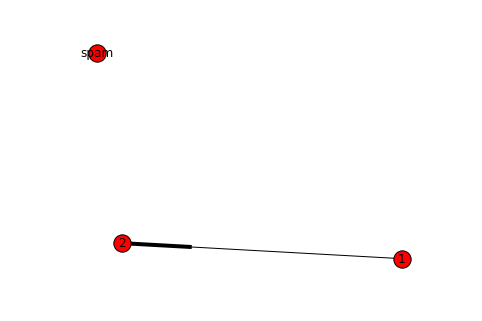

In [85]:
# 绘制网络
nx.draw(G, with_labels = True)

In [78]:
G = nx.Graph()
n = 0
with open ('/Users/dingjiayi/Desktop/www.dat.gz.txt') as f:
    for line in f:
        n += 1
          #if n % 10**4 == 0:
            # flushPrint(n)
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

In [79]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 325729\nNumber of edges: 1117563\nAverage degree:   6.8619'

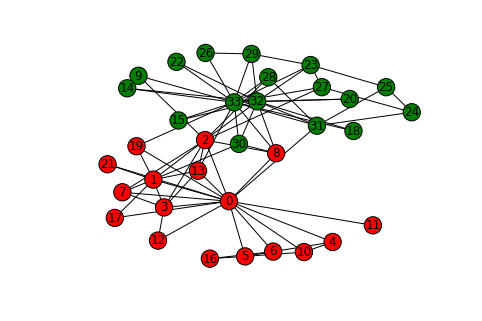

In [80]:
G = nx.karate_club_graph()
 
clubs = [G.node[i]['club'] for i in G.nodes()]
colors = []
for j in clubs:
    if j == 'Mr. Hi':
        colors.append('r')
    else:
        colors.append('g')
 
nx.draw(G,  with_labels = True, node_color = colors)

In [81]:
G.node[1] # 节点1的属性

{'club': 'Mr. Hi'}

In [82]:
G.edge.keys()[:3] # 前三条边的id

[0, 1, 2]

In [83]:
nx.info(G)

"Name: Zachary's Karate Club\nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882"

In [13]:
G.edges()[:3]#链接

[(0, 1), (0, 2), (0, 3)]

In [14]:
G.neighbors(1)

[0, 2, 3, 7, 13, 17, 19, 21, 30]

In [16]:
nx.diameter(G)#返回图G的直径（最长最短路径的长度）

5

In [15]:
nx.average_shortest_path_length(G) #平均最短路径

2.408199643493761

In [17]:
nx.density(G) #网络密集：实际边的数量／可能有的边的数量

0.13903743315508021

In [18]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))

0.13903743315508021

In [21]:
#聚集系数 对整个网络的已有三角形／可能有的三角形

In [22]:
cc = nx.clustering(G)#对节点的计算, 结果是字典
cc.items()[:5]

[(0, 0.15),
 (1, 0.3333333333333333),
 (2, 0.24444444444444444),
 (3, 0.6666666666666666),
 (4, 0.6666666666666666)]

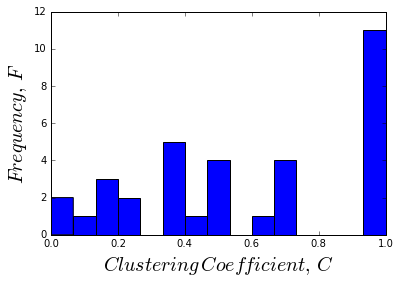

In [23]:
plt.hist(cc.values(), bins = 15)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

 直方图

In [24]:
#匹配系数

In [25]:
# M. E. J. Newman, Mixing patterns in networks Physical Review E, 67 026126, 2003
nx.degree_assortativity_coefficient(G) #计算一个图的度匹配性。

-0.47561309768461457

In [98]:
Ge=nx.Graph()
Ge.add_nodes_from([0,1],size=2)
Ge.add_nodes_from([2,3],size=3)
Ge.add_edges_from([(0,1),(2,3)])
print(nx.numeric_assortativity_coefficient(Ge,'size'))

1.0


In [99]:
dc = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G)
out_degree= nx.out_degree_centrality(G)

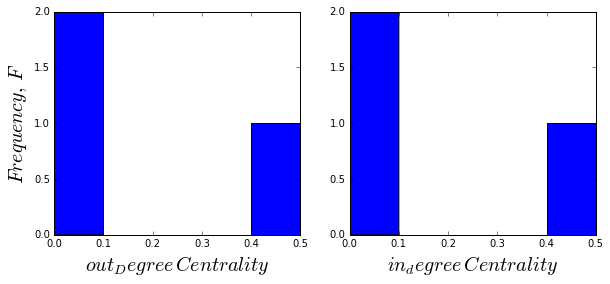

In [100]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(out_degree.values(), bins = 5)
plt.xlabel('$out_Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(in_degree.values(), bins = 5)
plt.xlabel('$in_degree \, Centrality$', fontsize = 20)

#ax = plt.subplot(1, 3, 3)
#plt.hist(betweenness.values(), bins = 20)
#plt.xlabel('$Betweenness \, Centrality$', fontsize = 20)
#plt.tight_layout()
#plt.show()

In [34]:
#网络科学：分析网络结构¶

10
100
1000
10000


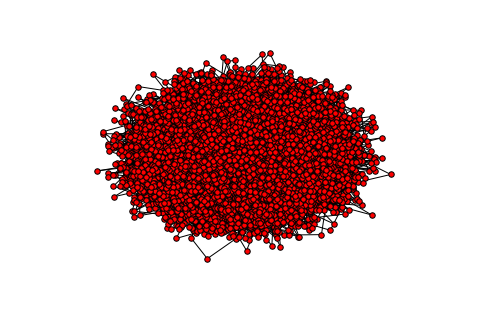

In [102]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

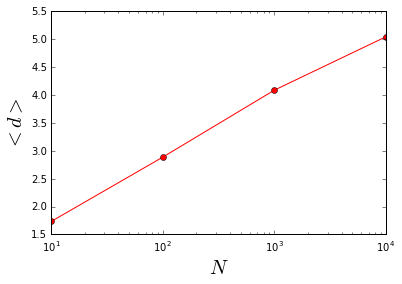

In [103]:
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
plt.xscale('log')
plt.show()